## 7. Group Assignment & Presentation



__You should be able to start up on this exercise after Lecture 1.__

*This exercise must be a group effort. That means everyone must participate in the assignment.*

In this assignment you will solve a data science problem end-to-end, pretending to be recently hired data scientists in
a company. To help you get started, we've prepared a checklist to guide you through the project. Here are the main steps
that you will go through:

1. Frame the problem and look at the big picture
2. Get the data
3. Explore and visualise the data to gain insights
4. Prepare the data to better expose the underlying data patterns to machine learning algorithms
5. Explore many different models and short-list the best ones
6. Fine-tune your models
7. Present your solution (video presentation) 

In each step we list a set of questions that one should have in mind when undertaking a data science project. The list
is not meant to be exhaustive, but does contain a selection of the most important questions to ask. We will be available
to provide assistance with each of the steps, and will allocate some part of each lesson towards working on the projects.

Your group must submit a _**single**_ Jupyter notebook, structured in terms of the first 6 sections listed above
(the seventh will be a video uploaded to some streaming platform, e.g. YouTube, Vimeo, etc.).


In [1]:
# Importing the necessary libraries for this project
# Standard Library modules
import os
import re
import shutil
import statistics

# Dependencies
import pandas as pd
import numpy as np
import tensorflow as tf
from keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns

2024-12-15 03:02:36.738188: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-15 03:02:36.770787: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-15 03:02:36.784046: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-15 03:02:36.943790: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


<!-- The following is the assignment description for the followning section, hidden from display
### 1. Analysis: Frame the problem and look at the big picture
1. Find a problem/task that everyone in the group finds interesting
2. Define the objective in business terms
3. How should you frame the problem (supervised/unsupervised etc.)?
4. How should performance be measured?
-->
## 1. Analysis: Frame the problem and look at the big picture
[//] # TODO: Write a description of the problem and the business objective. Define the problem in business terms.

### Problem Statement
Pokemon is the highest grossing media franchise of all time, leading ahead of other very popular franchises such as
Disney's Marvel or Star Wars. The franchise has its roots in a creature-collection RPG video game released back in
1996 for the GameBoy console. Since then, the franchise has expanded to include an animated series with 27 seasons as of
2024, 23 movies, a trading card game spanning decades, a myriad of licensed toys and merchandise, a video-game series
with 41 main games and countless spin-offs, and even a theme park in Japan.

The franchise's main appeal is the fictitious creatures known as Pokemon, which are caught and trained by the people in
the Pokemon world for battles. Each Pokemon has a unique style, ranging from cute to intimidating and everything in
between, they are classified into one or two elemental types and has a set of unique characteristics that sets them
apart.

Telling what a Pokemon is from an image is a task trivial for humans, but as the series has grown from its original 151
roaster of Pokemon to include the current 1025 species as of the latest additions in Pokemon Scarlet and Violet, it has
become a daunting task for anyone to keep track of all the Pokemon species and their types. Additionally, as the series
is sure to keep growing, more and more Pokemon will be added, making it even harder to keep track of them all.

With this in mind, we have devised a project to help Pokemon fans identify whether a creature is a Pokemon and what type
it is based on images, and to help identify even future Pokemon species. For this, an image classification model will be
developed in order to be able to tell Pokemon apart from creatures in other similar competing franchises such as Digimon,
as well as determine the elemental type of the Pokemon.

Ideally, this model would be only the tip of the pyramid, additional features could be added to turn this into a more
useful real application such as computer vision models to identify creatures from video footage for this model to classify,
a recommendation system to suggest creatures with an advantage against the identified Pokemon, and much more.

We hope this project will be a fun and interesting learning experience and that it builds a solid foundation.

### Objectives

The following notebook will include every step, from gathering the data for our model to training and evaluating it.
The main objective of this project is to develop a machine learning model capable of classifying images of fictitious
creatures as Pokemon or not, and for those identified as Pokemon, to classify them into their respective elemental types.

1. Determine if an image of a creature represents a Pokemon or not.
2. Determine the elemental type of those creatures identified as Pokemon.
3. Evaluate the performance of the model using appropriate metrics.

#### Framing the problem
##### Determine if an image of a creature represents a Pokemon or not.
In the case of the first objective, the problem involves binary classification, where the model's output needs only
to be a yes or no answer to the question "Is this a Pokemon?".

Since we desire a model capable of identifying Pokemon, supervised learning is the most appropriate approach, as we have
clearly labeled data to train the model on. An unsupervised approach would not be appropriate, as allowing the model to
find patterns in the data on its own would be a waste of time at best and produce a model with inaccurate results at worst.

To measure the performance of this model, there are a few metrics to take into account:
  - The model's accuracy defined by how many guesses are actually correct.
  - The model's precision defined as the fraction of the true predictions that are actually true.
  $$ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}} $$
  - The model's recall defined as the fraction of images correctly identified:
  $$\text{Recall}= \frac {\text{True Positives}}{\text{True Positives + False Negatives}} $$
  - F1 score is also an interesting metric, which is the mean of precision and recall. Since we're dealing with rates,
  the harmonic mean is used instead of the arithmetic mean for most appropriate results:
  $$\text{F1} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$
  - Area Under the Curve (AUC) is also a good metric to take into account, as it measures the area under the ROC curve,
  which is a plot of the true positive rate against the false positive rate.
  - Binary Cross-Entropy, which is the loss function used for  classification problems, is also a good metric to take
  into account, as it measures the difference between the predicted probability distribution and the true distribution.

##### Determine the Pokemon type
In the case of the second objective, the problem involves a multi-label classification, where the model's output needs
to be a list of types that the Pokemon belongs to. This is because some Pokemon species have more than one type, and the
model needs to be able to identify all of them.

Since we desire a model capable of identifying Pokemon types, supervised learning is the most appropriate approach, as we
have clearly labeled data to train the model on. The same as before, we have already classified data to train our model
with, and it helps us speed up the process to get higher accuracy.

To measure the performance of this model, there are a few metrics to take into account, firstly, since this is also a
classification problem, the same metrics as before can be used.


<!-- The following is the assignment description for the followning section, hidden from display
### 2. Get the data
1. Find and document where you can get the data from
2. Get the data
3. Check the size and type of data (time series, geographical etc)
-->
## 2. Get the data

### Data Sources

To train the model for Pokémon classification, two datasets have been selected
to cover the primary tasks: identifying Pokémon and distinguishing them from
non-Pokémon images. These datasets provide a robust foundation for the project.

- The PokeAPI dataset is an extensive dataset containing all sorts of information
about the Pokemon universe, including information on all Pokemon species, images
and other information such as moves, abilities, and locations. The dataset is
available on GitHub [here](https://github.com/PokeAPI/pokeapi.git) and the
corresponding submodules.

- The Digimon dataset is a collection of images scraped from the
[Wikimon.net](https://wikimon.net/Visual_List_of_Digimon) website and contains
about 1000 images of Digimon species and variations, since this only serves as
negative examples of Pokemon, we only need their images and none of the additional
information about them.

The web scrapper used to gather the Digimon data can be found on GitHub
[here](https://github.com/lorenzo-stacchio/Digimon_Dataset), although there
exists a Google Drive link with the data already gathered, which can be found
[here](https://drive.google.com/drive/folders/1tmcdsoX67NvmAgtmGJgo6kb3N6SlJeLu?usp=share_link)

In order for the rest of the notebook to properly be able to access the dataset, an additional
path.env configuration file is needed, the following is a sample of said file contents:

```properties
pokeAPI-data=path/to/PokeAPI
pokeAPI-sprites=path/to/PokeAPI-sprites
digimon-images=path/to/Digimon

dataset-dir=path/to/generated/dataset
```

Notably, `dataset-dir` is the directory where the generated dataset will be saved. In case that this is not the first
time that you run this notebook, the dataset will be read from this directory instead of being generated again, this is
a measure taken to save time and resources with subsequent runs of the notebook, during development where every session
a new Jupyter server is started and the whole notebook is run again, this is a very useful feature to have.

In [2]:
# This function reads the properties from the path.env file
def read_properties(path):
    props = {}
    property_regex = re.compile(r'#{0}(.+)[:=]([^\n\r#]+)#?')
    with open(path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            match = property_regex.match(line)
            if match:
                key = match.group(1).strip()
                value = match.group(2).strip()
                #print('Found property: {}={}'.format(key, value))
                props[key] = value
    return props

In [3]:
props = read_properties('paths.env')

pokeAPI_data_repo = props['pokeAPI-data']
pokeAPI_sprites_repo = props['pokeAPI-sprites']
digimon_datasource = props['digimon-images']

output_dir = props['dataset-dir']
display(props)

{'pokeAPI-data': '/media/ieris19/development-drive/Development/Data/PokeAPI/server',
 'pokeAPI-sprites': '/media/ieris19/development-drive/Development/Data/PokeAPI/sprites',
 'digimon-images': '/media/ieris19/development-drive/Development/Data/Digimon',
 'dataset-dir': '/media/ieris19/development-drive/Development/Data/MAL-project'}

In [4]:
# Using __ as a prefix to clarify that variables are not meant to be used later
# PokeAPI csv data
__pokeAPI_data_root = os.path.join(pokeAPI_data_repo, 'data/v2/csv')
# PokeAPI sprites folder
__pokeAPI_sprites_folder = os.path.join(pokeAPI_sprites_repo, 'sprites')
# Digimon images folder
__digimon_images_folder = os.path.join(digimon_datasource, 'images')

In [5]:
print('Checking for data...')
__pokeAPI_data_url = 'https://github.com/PokeAPI/pokeapi.git'
__pokeAPI_sprites_url = 'https://github.com/PokeAPI/sprites.git'
__digimon_data_url = 'https://drive.google.com/drive/folders/1tmcdsoX67NvmAgtmGJgo6kb3N6SlJeLu?usp=share_link'

__missing_sources = []
if not os.path.exists(__pokeAPI_data_root):
    print('You must download the PokeAPI data first from the following git: {}'.format(__pokeAPI_data_url))
    __missing_sources.append('PokeAPI data')
else:
    print('Retrieving PokeAPI data from: {}'.format(__pokeAPI_data_root))

if not os.path.exists(__pokeAPI_sprites_folder):
    print('You must download the PokeAPI sprites first from the following git: {}'.format(__pokeAPI_sprites_url))
    __missing_sources.append('PokeAPI sprites')
else:
    print('Retrieving PokeAPI sprites from: {}'.format(__pokeAPI_sprites_folder))

if not os.path.exists(__digimon_images_folder):
    print('You must download the Digimon data first from the following Google Drive: {}'.format(__digimon_data_url))
    __missing_sources.append('Digimon images')
else:
    print('Retrieving Digimon images from: {}'.format(__digimon_images_folder))

if len(__missing_sources) > 1:
    print('You must download the following sources: {}'.format(', '.join(__missing_sources)))
    # TODO: If props['debug'] is False raise the error?, we can then control it from paths.env and rename it .env
    # raise FileNotFoundError('Missing data sources')

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

Checking for data...
Retrieving PokeAPI data from: /media/ieris19/development-drive/Development/Data/PokeAPI/server/data/v2/csv
Retrieving PokeAPI sprites from: /media/ieris19/development-drive/Development/Data/PokeAPI/sprites/sprites
Retrieving Digimon images from: /media/ieris19/development-drive/Development/Data/Digimon/images


In [6]:
# Verify the datasource hasn't generated earlier
dataset_dir = os.path.join(output_dir, 'dataset')
dataset_path = os.path.join(dataset_dir, 'pokemon.csv')
generate_dataset = True
if os.path.exists(dataset_path):
    generate_dataset = False
    print('The dataset has already been generated, please delete to regenerate')

The dataset has already been generated, please delete to regenerate


<!-- The following is the assignment description for the followning section, hidden from display
## 3. Explore the data
1. Create a copy of the data for explorations (sampling it down to a manageable size if necessary)
2. Create a Jupyter notebook to keep a record of your data exploration
3. Study each feature and its characteristics:
    * Name
    * Type (categorical, int/float, bounded/unbounded, text, structured, etc)
    * Percentage of missing values
    * Check for outliers, rounding errors etc
4. For supervised learning tasks, identify the target(s)
5. Visualise the data
6. Study the correlations between features
7. Identify the promising transformations you may want to apply (e.g. convert skewed targets to normal via a log transformation)
8. Document what you have learned
-->
#### Data exploration

- PokeAPI Dataset:
    - The dataset contains images for all Pokemon species, one for each game
    they have been in among many alternate forms and color variations.
    - The dataset also includes CSV files with information about Pokemon, where
    to find them, their moves and abilities, etc...
- Digimon Dataset
    - The dataset contains images scraped from the Digimon wiki, this includes
    roughly about a thousand images of Digimon species and variations.

In [7]:
# Exploring the available data
def retrieve_relevant_files(path, extension) -> list:
    available_files = []
    files = os.listdir(path)
    for file in files:
        if os.path.isdir(os.path.join(path, file)) and extension != '':
            sub_files = retrieve_relevant_files(os.path.join(path, file), extension)
            for sub_file in sub_files:
                available_files.append(f'{file}/{sub_file}')
        if os.path.isdir(os.path.join(path, file)) and extension == '':
            available_files.append(file)
            sub_dirs = retrieve_relevant_files(os.path.join(path, file), extension)
            for sub_dir in sub_dirs:
                available_files.append(f'{file}/{sub_dir}')
        elif os.path.isfile(os.path.join(path, file)) and extension != '' and file.endswith(extension):
            available_files.append(file)
    return available_files

def find_relevant_sources(path, extension, missing_key):
    if missing_key not in __missing_sources:
        print('-'*20)
        print(f'{missing_key} files:')
        for file in retrieve_relevant_files(path, extension):
            print(file)
    else:
        print(f'{missing_key} files not found, skipping instrospection')

find_relevant_sources(__pokeAPI_data_root, '.csv', 'PokeAPI data')
find_relevant_sources(__pokeAPI_sprites_folder, '', 'PokeAPI sprites')
find_relevant_sources(__digimon_images_folder, '', 'Digimon images')

--------------------
PokeAPI data files:
abilities.csv
ability_changelog.csv
ability_changelog_prose.csv
ability_flavor_text.csv
ability_names.csv
ability_prose.csv
berries.csv
berry_firmness.csv
berry_firmness_names.csv
berry_flavors.csv
characteristics.csv
characteristic_text.csv
conquest_episodes.csv
conquest_episode_names.csv
conquest_episode_warriors.csv
conquest_kingdom_names.csv
conquest_max_links.csv
conquest_move_data.csv
conquest_move_displacements.csv
conquest_move_displacement_prose.csv
conquest_move_effects.csv
conquest_move_effect_prose.csv
conquest_move_ranges.csv
conquest_move_range_prose.csv
conquest_pokemon_abilities.csv
conquest_pokemon_evolution.csv
conquest_pokemon_moves.csv
conquest_pokemon_stats.csv
conquest_stats.csv
conquest_transformation_pokemon.csv
conquest_transformation_warriors.csv
conquest_warriors.csv
conquest_warrior_archetypes.csv
conquest_warrior_names.csv
conquest_warrior_ranks.csv
conquest_warrior_rank_stat_map.csv
conquest_warrior_skills.csv
conqu

#### The data:
We can see there's an unending list of csv files in the PokeAPI dataset, most of these are not really relevant to us, as
we are only interested in the Pokemon species and their types, as such, we will only be using the following files:
- pokemon.csv
    - This file contains the information of a Pokemon, such as its name, height, weight, and other information, we will
    have to trim it but it's a start
- types.csv
    - This file contains an index of all types of Pokemon, such as fire, water, grass, etc... We will also have to trim
    this as we're not interested in the damage class or generation of the type.
- pokemon_types.csv
    - This file contains the relationship between Pokemon and their types, we will use this to merge the Pokemon and
    types so that we can have a single dataset with all our relevant information.

#### The images
As we can see, with the Digimon data it's pretty straightforward, we have a folder with all the images, since these are
only negative examples of non-Pokemon creatures, we don't need to worry about any additional information about them, we
can simply use all of them (despite many being alternate forms, color variations, etc...).

As for the Pokemon images, we have many folders that can be immediately, folders such as badges and items for containing
images that are irrelevant to our task at hand. As for the remaining, the types folder is promising but upon closer
inspection, it contains images of the type labels in a badge, which isn't useful for us, the only folder that contains
the images we need is the `pokemon` folder.

In this folder, we have pictures of Pokemon as well as several subfolders, each containing even more pictures of the
Pokemon. For briefness, we will refer to the [dataset-readme](https://github.com/PokeAPI/sprites/blob/master/README.md)
in order to obtain more information about the images. We can see that the images are named after the Pokemon's ID, and
that they're divided depending on the source game. Most of these contain pixel-art images of the Pokemon, but there is
some promising folders that align with the art-style of our negative set of Digimon images, which makes it so that the
model will have to rely on the features of the Pokemon to classify them, rather than the art-style.

The most promising folders are the `other/official-artwork` which contain artist renditions of every Pokemon and the
`other/dream-world` which contain images of the Pokemon in a more cartoony style from the browser game Pokemon Dream World.
However, our decision is made easy knowing that the `official-artwork` folder contains images of all Pokemon to date while
the `dream-world` folder only contains images of the first 649 Pokemon, which is a subset of the `official-artwork` folder.

This means that we will only be using the `official-artwork` folder for our model, as it contains all the images we need.



In [8]:
def import_data():
    original_pokemon = pd.read_csv(os.path.join(__pokeAPI_data_root, 'pokemon.csv'))
    original_types = pd.read_csv(os.path.join(__pokeAPI_data_root, 'types.csv'))
    original_pokemon_types = pd.read_csv(os.path.join(__pokeAPI_data_root, 'pokemon_types.csv'))
    return original_pokemon, original_types, original_pokemon_types

#### Trimming the data

The PokeAPI dataset is quite extensive, it contains all Pokemon (currently 1025)
and also many alternative form information. This information is assigned an ID
that is greater than 10000 so that it does not interfere with the original Pokemon
IDs, as such, we must filter out all IDs greater than 10000.

Additionally, we will remove a lot of the columns that are not relevant to our
current analysis, such as the foreign keys pointing to relationships outside our
scope and some of the data irrelevant to us such as height and weight.

There's also some types that are not relevant to our analysis, because they are
only used for alternate forms of Pokemon which we have removed already, such as
the "shadow" type. We will remove these types from the dataset, thankfully, the
same as Pokemon IDs apply, these types have IDs greater than 10000.

We will also rename some of the columns to make them more readable and to avoid
confusion later on.

The following are the functions that will generate a new trimmed dataset for us
to use in our model. However, as mentioned earlier, before calling these functions
we will check if the dataset has already been generated, if it has, we will read
it instead to save time and resources.

In [9]:
def clean_source_datasets(original_pokemon, original_types, original_pokemon_types):
    id_cutoff = 10000

    pokemon_types = original_pokemon_types[original_pokemon_types['pokemon_id'] < id_cutoff]
    pokemon = original_pokemon[original_pokemon['id'] < id_cutoff]
    types = original_types[original_types['id'] < id_cutoff]
    types = types.drop(columns=['damage_class_id', 'generation_id'])
    pokemon = pokemon.drop(columns=['species_id', 'height', 'weight', 'base_experience', 'order', 'is_default'])
    pokemon = pokemon.rename(columns={'identifier': 'name'})
    types = types.rename(columns={'identifier': 'type_label'})
    return pokemon, types, pokemon_types

In [10]:
def merge_dataset(pokemon, types, pokemon_types):
    merged = pokemon_types.merge(types, left_on='type_id', right_on='id').drop(columns=['id'])
    merged = merged.rename(columns={'identifier': 'type', 'slot': 'type_slot'})
    merged = pokemon.merge(merged, left_on='id', right_on='pokemon_id').drop(columns=['id'])
    dataset_target = os.path.join(dataset_dir, 'pokemon.csv')
    if not os.path.exists(dataset_dir):
        os.makedirs(dataset_dir)
    merged.to_csv(dataset_target, index=False)
    print('Pokemon data saved to {} for saving'.format(dataset_target))
    return merged

In [11]:
# Generate or read the dataset based on the previous checks
if generate_dataset:
    pokemon_merged = merge_dataset(*clean_source_datasets(*import_data()))
else:
    print('Reading dataset from {}'.format(dataset_path))
    pokemon_merged = pd.read_csv(dataset_path)
pokemon_merged

Reading dataset from /media/ieris19/development-drive/Development/Data/MAL-project/dataset/pokemon.csv


,name,pokemon_id,type_id,type_slot,type_label
0,bulbasaur,1,12,1,grass
1,bulbasaur,1,4,2,poison
2,ivysaur,2,12,1,grass
3,ivysaur,2,4,2,poison
4,venusaur,3,12,1,grass
...,...,...,...,...,...
1546,iron-crown,1023,9,1,steel
1547,iron-crown,1023,14,2,psychic
1548,terapagos,1024,1,1,normal
1549,pecharunt,1025,4,1,poison


In [12]:
# Check if images have already been extracted:
images_dir = os.path.join(output_dir, 'images')
extract_images = {}
pokemon_images_dir = os.path.join(images_dir, 'pokemon')
digimon_images_dir = os.path.join(images_dir, 'digimon')
extract_images['pokemon'] = not os.path.exists(pokemon_images_dir)
extract_images['digimon'] = not os.path.exists(digimon_images_dir)

In [13]:
def extract_pokemon_images():
    source_images = os.path.join(__pokeAPI_sprites_folder, 'pokemon/other/official-artwork')
    poke_image_files = os.listdir(source_images)
    print('Preparing {} Pokemon images...'.format(len(poke_image_files)))
    os.makedirs(pokemon_images_dir)
    # Like the data, images with ID higher than 10000 are not relevant
    valid_image_pattern = re.compile(r'^[0-9]{1,4}\.png')
    for file in poke_image_files:
        if valid_image_pattern.match(file):
            source = os.path.join(source_images, file)
            target = os.path.join(pokemon_images_dir, file)
            shutil.copy(source, target)
            print('Copied {} to {}'.format(file, target))

In [14]:
def extract_digimon_images():
    digimon_image_files = os.listdir(__digimon_images_folder)
    print('Preparing {} Digimon images...'.format(len(digimon_image_files)))
    os.makedirs(digimon_images_dir)
    for file in digimon_image_files:
        source = os.path.join(__digimon_images_folder, file)
        target = os.path.join(digimon_images_dir, file)
        shutil.copy(source, target)
        print('Copied file\n\tfrom: {}\n\tto: {}'.format(file, target))

In [15]:
if extract_images['pokemon']:
    extract_pokemon_images()
else:
    print('Pokemon images already extracted')
if extract_images['digimon']:
    extract_digimon_images()
else:
    print('Digimon images already extracted')

Pokemon images already extracted
Digimon images already extracted


[//] # TODO: Add some visualization here to show some images and maybe some graphs
## Dataset Visualization

The following graphs give us a small insight into the relationship between Pokemon
and types, as well as the distribution of types across all existing Pokemon.

The first graph shows the count of Pokemon per type, please note, that Pokemon with
two types will be counted once in each type so that the sum of the counts will be
greater than the total number of Pokemon. This isn't a problem because we're
looking at the distribution of types, not the distribution of Pokemon.

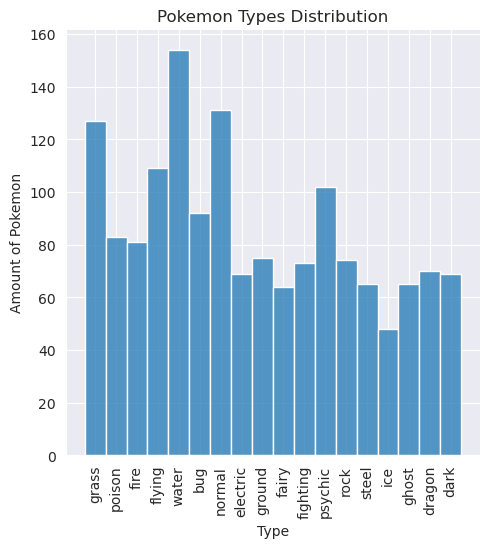

count     18.000000
mean      86.166667
std       27.931113
min       48.000000
25%       69.000000
50%       74.500000
75%       99.500000
max      154.000000
Name: count, dtype: float64

In [16]:
sns.displot(data=pokemon_merged['type_label'])

plt.title('Pokemon Types Distribution')
plt.xlabel('Type')
plt.ylabel('Amount of Pokemon')
plt.xticks(rotation=90)


plt.show()
pokemon_merged['type_label'].value_counts().describe()

In [17]:
# Let's look at how many Pokemon have more than one type
all_pokemon = pokemon_merged[pokemon_merged['type_slot'] == 1]
multi_type_pokemon = pokemon_merged[pokemon_merged['type_slot'] > 1]

all_pokemon_count = all_pokemon.__len__()
multi_type_pokemon_count = multi_type_pokemon.__len__()

multi_type_percent = (multi_type_pokemon_count / all_pokemon_count) * 100

print(f'There are {multi_type_pokemon.__len__()} Pokemon with more than one type')
print(f'This is {multi_type_percent:.2f}% of all Pokemon')

There are 526 Pokemon with more than one type
This is 51.32% of all Pokemon


<!-- [//] # TODO: Do we really account for this? -->
The previous calculation shows that 51.32% of all Pokemon have more than one type,
this is a more than significant amount of Pokemon that have more than one type,
as such, we cannot limit ourselves to guessing only one type per Pokemon, we must
be able to guess multiple types per Pokemon.



<!-- The following is the assignment description for the followning section, hidden from display
## 4. Prepare the data
Notes:
* Work on copies of the data (keep the original dataset intact).
* Write functions for all data transformations you apply, for three reasons:
    * So you can easily prepare the data the next time you run your code
    * So you can apply these transformations in future projects
    * To clean and prepare the test set

1. Data cleaning:
    * Fix or remove outliers (or keep them)
    * Fill in missing values (e.g. with zero, mean, median, regression ...) or drop their rows (or columns)
2. Feature selection (optional):
    * Drop the features that provide no useful information for the task (e.g. a customer ID is usually useless for modelling).
3. Feature engineering, where appropriate:
    * Discretize continuous features
    * Use one-hot encoding if/when relevant
    * Add promising transformations of features (e.g. $\log(x)$, $\sqrt{x}$, $x^2$, etc)
    * Aggregate features into promising new features
4. Feature scaling: standardise or normalise features
-->
## 4. Preparation

Our extracted .csv data has already been trimmed to just the necessary columns, so
not much will be needed there, since we are dealing with a full dataset there's
no missing values to fill, nor does categorical data need to be adjusted for
outliers.

Thankfully, Pokemon have assinged IDs that are unique and match the images already,
as well as the beneficial quirk of starting with normalized data, it gives us already
a numerical ID for all types that we very intentionally left in the dataset, thus,
we have both labels, and numerical values for all the variables we're interested
in our tasks.

As such, we can safely move on to processing the images.

### Image Processing
From our research, images will need two main transformations:
- The must be resized to a common smaller size, this means both the Pokemon and
Digimon images will have the same size, equalizing our inputs, but also reducing
the computational cost of processing the images.
- The images can be converted to a uniform image format (PNG in our case) for
consistency.

Additional optimizations have been made to the images, such as adding a white
background to the PNG images with transparency, this is to ensure that the
model can't fixate itself on the transparency of the images, as well as to
ensure that the images are all as uniform as possible, removing as much possible
bias as possible from the images.

In [18]:
from PIL import Image
import os

# Configuration
final_img_dir = os.path.join(output_dir, 'pre-processed')
# The following tuple defines the final resolution of the images
new_size = (128, 128)

pkm_output = os.path.join(final_img_dir, 'pokemon')
dmn_output = os.path.join(final_img_dir, 'digimon')

# Ensure output folder exists
os.makedirs(final_img_dir, exist_ok=True)
os.makedirs(pkm_output, exist_ok=True)
os.makedirs(dmn_output, exist_ok=True)

def resize_images(input_folder, output_folder, size):
    for filename in os.listdir(input_folder):
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, filename)
        file_extension = os.path.splitext(filename)[1].lower()
        try:
            with Image.open(input_path) as img:
                img.thumbnail(size)  # Resizes while maintaining aspect ratio
                if file_extension in ['.jpg', '.jpeg']:
                    img = img.convert('RGB')  # Ensure JPEG images are in RGB mode
                    output_path = os.path.splitext(output_path)[0] + '.png'  # Change extension to .png
                    img.save(output_path, 'PNG', icc_profile=None)
                else:
                    img = img.convert('RGBA')
                    # Create a white background
                    background = Image.new('RGBA', img.size, (255, 255, 255, 255))
                    # Composite the image with the white background
                    img = Image.alpha_composite(background, img).convert('RGB')
                    img.save(output_path, 'PNG', icc_profile=None)
                print(f"Resized and saved: {filename}")
        except Exception as e:
            print(f"Failed to process {filename}: {e}")

# Check if output_folder is empty
if not os.listdir(pkm_output) and not os.listdir(dmn_output):
    print(f"The output folder {final_img_dir} is empty. Resizing images.")
    resize_images(pokemon_images_dir, pkm_output, new_size)
    resize_images(digimon_images_dir, dmn_output, new_size)
else:
    print(f"The output folder {final_img_dir} is not empty. Skipping resizing.")
# resize_images(pokemon_images_dir, os.path.join(final_img_dir, 'pokemon'), new_size)
# resize_images(digimon_images_dir, os.path.join(final_img_dir, 'digimon'), new_size)


The output folder /media/ieris19/development-drive/Development/Data/MAL-project/pre-processed is not empty. Skipping resizing.


 <!-- The following is the assignment description for the followning section, hidden from display
## 5. Short-list promising models
We expect you to do some additional research and train at **least one model per team member**.

1. Train mainly quick and dirty models from different categories (e.g. linear, SVM, Random Forests etc) using default parameters
2. Measure and compare their performance
3. Analyse the most significant variables for each algorithm
4. Analyse the types of errors the models make
5. Have a quick round of feature selection and engineering if necessary
6. Have one or two more quick iterations of the five previous steps
7. Short-list the top three to five most promising models, preferring models that make different types of errors
-->
<!-- [//] # TODO: This is where we train two models !!! One for each task OR remove one of the tasks? -->
## 5. Promising models test

Image classification is a well-known problem in the field of machine learning,
and probably one of the most widely used applications of machine learning. As
such, we can deduce that the most commonly used models for image classification
will be the most promising for our task. Support Vector Machines and Neural Networks
are the most commonly used models for image classification, however, SVM
specifically is not well-suited as it is best suited for problems of linear
classification.

Neural Networks are a much more versatile model, and they can be used for a wide
variety of tasks, including image classification. Convolutional Neural Networks
are a type of neural network that is almost synonymous with image classification,
being the most common model used for these kind of tasks, however, for the purpose
of verifying this idea, we will test a simple Feedforward Neural Network and a
Convolutional Neural Network to see which one performs better.

## Final Dataset Preparation
Before we actually, begin working with the data, we need to prepare it in such a
way that the models can easily process them. Keras, a utility within TensorFlow
allows us to quickly preprocess and prepare the data for Neural Network training.

We will ensure images are the right size (although they've already been resized)
and define the other parameters so that we can train several neural networks

In [19]:
# Dataset properties
IMG_SIZE = 128
BATCH_SIZE = 32
BUFFER_SIZE = 2000

In [20]:
# Declare a function to load data
def data_loader(path, subset):
    if subset:
        return tf.keras.preprocessing.image_dataset_from_directory(
            path,
            interpolation='area',
            validation_split=0.2,
            subset=subset,
            shuffle=True,
            seed=123,
            image_size=(IMG_SIZE, IMG_SIZE),
            batch_size=BATCH_SIZE
        )
    else:
        return tf.keras.preprocessing.image_dataset_from_directory(
            path,
            interpolation='area',
            shuffle=True,
            seed=123,
            image_size=(IMG_SIZE, IMG_SIZE),
            batch_size=BATCH_SIZE
        )

In [21]:
# Split the dataset into appropriate portions
train_ds = data_loader(final_img_dir, 'training')

val_ds = data_loader(final_img_dir, 'validation')

test_ds = data_loader(final_img_dir, None)

Found 2152 files belonging to 2 classes.
Using 1722 files for training.


I0000 00:00:1734228170.549991  147948 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1734228171.091709  147948 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1734228171.091944  147948 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1734228171.093502  147948 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Found 2152 files belonging to 2 classes.
Using 430 files for validation.
Found 2152 files belonging to 2 classes.


### FNN
#### Load the data
We will mainly use Tensorflow and Keras to build our models, as they are the most
widely used and de-facto standard for building neural networks. We will start by
loading the data and then building the model.

In [22]:
# Build Feedforward neural network
fnn_model = models.Sequential([
    layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)), # 3 channels for RGB
    layers.Rescaling(1./255), # normalize pixel values to [0, 1]
    layers.Flatten(), # flatten the 128x128x3 input images
    layers.Dense(512, activation='relu'), # fully connected layer with 512 units and ReLU activation
    layers.Dropout(0.25), # dropout layer to prevent overfitting, drops 25% of the units
    layers.Dense(256, activation='relu'), # fully connected layer with 256 units and ReLU activation
    layers.Dropout(0.125), # dropout layer to prevent overfitting, drops 12.5% of the units
    layers.Dense(1, activation='sigmoid') # output layer with 1 unit and sigmoid activation for binary classification
], name='FNN_Test')

# compile model
fnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall', 'AUC'],
    jit_compile=True
)

# inspect model
fnn_model.summary()

Model: "FNN_Test"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 49152)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    25,166,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,297,921 (96.50 MB)

 Trainable params: 25,297,921 (96.50 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# stop when val_accuracy doesnt improve
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

training = fnn_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=25,
    steps_per_epoch=2000 // BATCH_SIZE,
    callbacks=[early_stopping]
)

# evaluate on test set
test_loss, test_acc, test_precision, test_recall, test_auc = fnn_model.evaluate(test_ds)
print(f"\nTest accuracy: {test_acc:.4f}")
print(f"Test precision: {test_precision:.4f}")
print(f"Test recall: {test_recall:.4f}")
print(f"Test F1: {statistics.harmonic_mean([test_precision, test_recall]):.4f}")
print(f"Test AUC: {test_auc:.4f}")
# print(f"Test loss: {test_loss:.4f}")

Epoch 1/25


I0000 00:00:1734228177.265431  148058 service.cc:146] XLA service 0x7f00a000c3a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734228177.265457  148058 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1050 Ti, Compute Capability 6.1
2024-12-15 03:02:57.344467: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-12-15 03:02:57.570199: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90101


 3/62 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - AUC: 0.4693 - Precision: 0.5580 - Recall: 0.3085 - accuracy: 0.4655 - loss: 32.4204: 32.4204

I0000 00:00:1734228180.145584  148058 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


54/62 ━━━━━━━━━━━━━━━━━━━━ 3s 477ms/step - AUC: 0.4991 - Precision: 0.4930 - Recall: 0.4734 - accuracy: 0.5021 - loss: 16.0886

2024-12-15 03:03:25.428269: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-12-15 03:03:25.428306: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
/home/ieris19/.conda/envs/MachineLearning/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
2024-12-15 03:03:31.539449: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 100663296 exceeds 10% of free system memory.
2024-12-15 03:03:31.777106: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 100663296 exceeds 10

62/62 ━━━━━━━━━━━━━━━━━━━━ 38s 523ms/step - AUC: 0.4978 - Precision: 0.4905 - Recall: 0.4743 - accuracy: 0.5014 - loss: 15.3158 - val_AUC: 0.7123 - val_Precision: 0.6750 - val_Recall: 0.1337 - val_accuracy: 0.5628 - val_loss: 0.6667
Epoch 2/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - AUC: 0.5260 - Precision: 0.4950 - Recall: 0.5006 - accuracy: 0.5134 - loss: 1.8245 - val_AUC: 0.6978 - val_Precision: 0.5500 - val_Recall: 0.0545 - val_accuracy: 0.5349 - val_loss: 0.6731
Epoch 3/25


2024-12-15 03:03:32.879122: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


50/62 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5604 - Precision: 0.5459 - Recall: 0.5447 - accuracy: 0.5506 - loss: 0.7055

2024-12-15 03:03:33.872155: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 100663296 exceeds 10% of free system memory.


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - AUC: 0.5626 - Precision: 0.5457 - Recall: 0.5425 - accuracy: 0.5517 - loss: 0.7053 - val_AUC: 0.6603 - val_Precision: 0.6730 - val_Recall: 0.5297 - val_accuracy: 0.6581 - val_loss: 0.6798
Epoch 4/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - AUC: 0.4934 - Precision: 0.5508 - Recall: 0.0447 - accuracy: 0.5329 - loss: 0.6918 - val_AUC: 0.5085 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.5302 - val_loss: 0.6904
Epoch 5/25


2024-12-15 03:03:34.866924: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-12-15 03:03:34.866955: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12005889478531810639
2024-12-15 03:03:34.866969: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 17281436893529773292


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - AUC: 0.5044 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.5244 - loss: 0.6920 - val_AUC: 0.5000 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.5302 - val_loss: 0.6917
Epoch 6/25
 1/62 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - AUC: 0.5625 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.4844 - loss: 0.6945

2024-12-15 03:03:35.692275: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12005889478531810639
2024-12-15 03:03:35.694373: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 17281436893529773292


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - AUC: 0.5362 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.5228 - loss: 0.6923 - val_AUC: 0.4978 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.5302 - val_loss: 0.6916
Epoch 7/25


2024-12-15 03:03:36.521048: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12005889478531810639
2024-12-15 03:03:36.521089: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 17281436893529773292


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - AUC: 0.4889 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.5246 - loss: 0.6920 - val_AUC: 0.4978 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.5302 - val_loss: 0.6916
Epoch 8/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - AUC: 0.4967 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.5285 - loss: 0.6918 - val_AUC: 0.5000 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.5302 - val_loss: 0.6915
Epoch 8: early stopping
Restoring model weights from the end of the best epoch: 3.


2024-12-15 03:03:38.191648: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-12-15 03:03:38.191685: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12005889478531810639
2024-12-15 03:03:38.191745: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 17281436893529773292


20/68 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - AUC: 0.7071 - Precision: 0.7480 - Recall: 0.5551 - accuracy: 0.6912 - loss: 0.6724

2024-12-15 03:03:38.588382: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 100663296 exceeds 10% of free system memory.


68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - AUC: 0.6943 - Precision: 0.7126 - Recall: 0.5699 - accuracy: 0.6813 - loss: 0.6743

Test accuracy: 0.6747
Test precision: 0.6979
Test recall: 0.5590
Test F1: 0.6208
Test AUC: 0.6842


### CNN
A simple FNN is a good enough start so we can work through adding Convolution
into our Neural Network to see if we can get better results, with this, the new
Neural Network will hopefully perform better, since images have enormous
dimensionality, convolution can help reduce it and thus allow the system to make
more accurate predictions for less computational cost

In [26]:
# Define the CNN model
cnn_model = models.Sequential([
    layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.Rescaling(1./255),  # Normalize pixel values to [0, 1]

    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),# Flatten the image input
    layers.GlobalAveragePooling2D(),

    layers.Dense(256, activation='relu'),  # Fully connected layer
    layers.Dropout(0.25),  # Dropout to prevent overfitting
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
], name='CNN_Test')

# Compile the model
cnn_model.compile(
    optimizer=tf.keras.optimizers.AdamW(learning_rate=0.0001),  # Optimizer with default learning rate
    loss='binary_crossentropy',  # Loss function for binary classification
    metrics=['accuracy', 'Precision', 'Recall', 'AUC'],  # Evaluation metrics
    jit_compile=True  # Enable JIT compilation for speedup
)

# Print model summary
cnn_model.summary()

Model: "CNN_Test"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,377 (146.00 KB)

 Trainable params: 37,121 (145.00 KB)

 Non-trainable params: 256 (1.00 KB)

In [27]:
# Train the model
cnn_model_history = cnn_model.fit(
    train_ds,  # Replace with your training dataset
    validation_data=val_ds,  # Replace with your validation dataset
    epochs=10,  # Number of epochs
    batch_size=32  # Batch size
)

# Evaluate the model
results = cnn_model.evaluate(test_ds)
print(f"Test Results - Loss: {results[0]}, Accuracy: {results[1]}")


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 17s 185ms/step - AUC: 0.7191 - Precision: 0.6495 - Recall: 0.6339 - accuracy: 0.6715 - loss: 0.6625 - val_AUC: 0.7992 - val_Precision: 0.4698 - val_Recall: 1.0000 - val_accuracy: 0.4698 - val_loss: 0.6922
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - AUC: 0.8656 - Precision: 0.7686 - Recall: 0.8315 - accuracy: 0.7990 - loss: 0.5551 - val_AUC: 0.8823 - val_Precision: 0.4915 - val_Recall: 1.0000 - val_accuracy: 0.5140 - val_loss: 0.6779
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - AUC: 0.9070 - Precision: 0.7879 - Recall: 0.8722 - accuracy: 0.8271 - loss: 0.4811 - val_AUC: 0.9315 - val_Precision: 0.8318 - val_Recall: 0.9059 - val_accuracy: 0.8698 - val_loss: 0.6517
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - AUC: 0.9334 - Precision: 0.8194 - Recall: 0.9037 - accuracy: 0.8587 - loss: 0.4140 - val_AUC: 0.9560 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.5302 - val_loss: 0.6286
Epoch 5/10
54/54 ━━━━━━━━━

<!-- The following is the assignment description for the followning section, hidden from display
### 6. Fine-tune the system
1. Fine-tune the hyperparameters
2. Once you are confident about your final model, measure its performance on the test set to estimate the generalisation error
<!-- [//] # TODO: Optimizing the chosen models
     [//] # TODO: What is each model predicting and how can we visualize that?
-->
# 6. Fine-tune the system
With the previously acquired knowledge, Convolutional Networks outperform the
simpler Feedforward neural network.

We will also focus on optimizing the parameters so that we obtain the best
results possible

In [28]:
# build CNN model
pokemon_predictor = tf.keras.Sequential([
    layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),

    layers.Rescaling(1./255),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),

    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),

    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),

    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
], name='Pokemon_Predictor')

# compile model
pokemon_predictor.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall', 'AUC'],
    jit_compile=True
)

# inspect model
pokemon_predictor.summary()

Model: "Pokemon_Predictor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 438,657 (1.67 MB)

 Trainable params: 437,761 (1.67 MB)

 Non-trainable params: 896 (3.50 KB)

In [29]:
# training loop
pokemon_predictor.fit(
    train_ds,
    epochs=25,
    steps_per_epoch=2000 // BATCH_SIZE,
    validation_data=val_ds,
    callbacks=[early_stopping]
)

# evaluate on test set
test_loss, test_acc = pokemon_predictor.evaluate(test_ds)
print(f"\nTest accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

Epoch 1/25


2024-12-15 03:05:51.452521: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_5', 4 bytes spill stores, 12 bytes spill loads



54/62 ━━━━━━━━━━━━━━━━━━━━ 1s 219ms/step - AUC: 0.8697 - Precision: 0.7554 - Recall: 0.8383 - accuracy: 0.7922 - loss: 0.4642

2024-12-15 03:06:03.095719: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_7', 4 bytes spill stores, 12 bytes spill loads

2024-12-15 03:06:03.126255: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 17281436893529773292
/home/ieris19/.conda/envs/MachineLearning/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


62/62 ━━━━━━━━━━━━━━━━━━━━ 30s 292ms/step - AUC: 0.8736 - Precision: 0.7586 - Recall: 0.8435 - accuracy: 0.7962 - loss: 0.4575 - val_AUC: 0.7311 - val_Precision: 0.4698 - val_Recall: 1.0000 - val_accuracy: 0.4698 - val_loss: 0.8390
Epoch 2/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - AUC: 0.9621 - Precision: 0.8734 - Recall: 0.9511 - accuracy: 0.9105 - loss: 0.2592 - val_AUC: 0.6448 - val_Precision: 0.4698 - val_Recall: 1.0000 - val_accuracy: 0.4698 - val_loss: 1.0729
Epoch 3/25
52/62 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - AUC: 0.9705 - Precision: 0.8777 - Recall: 0.9459 - accuracy: 0.9126 - loss: 0.2343

2024-12-15 03:06:17.086196: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 17281436893529773292


62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - AUC: 0.9703 - Precision: 0.8777 - Recall: 0.9459 - accuracy: 0.9125 - loss: 0.2341 - val_AUC: 0.8557 - val_Precision: 0.4698 - val_Recall: 1.0000 - val_accuracy: 0.4698 - val_loss: 1.1146
Epoch 4/25
54/62 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - AUC: 0.9722 - Precision: 0.8857 - Recall: 0.9530 - accuracy: 0.9182 - loss: 0.2159

2024-12-15 03:06:21.107189: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 17281436893529773292


62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - AUC: 0.9723 - Precision: 0.8864 - Recall: 0.9534 - accuracy: 0.9188 - loss: 0.2151 - val_AUC: 0.8922 - val_Precision: 0.4698 - val_Recall: 1.0000 - val_accuracy: 0.4698 - val_loss: 0.8462
Epoch 5/25
54/62 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - AUC: 0.9777 - Precision: 0.9008 - Recall: 0.9419 - accuracy: 0.9217 - loss: 0.1950

2024-12-15 03:06:25.092029: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12005889478531810639
2024-12-15 03:06:25.094298: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 17281436893529773292


62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - AUC: 0.9777 - Precision: 0.9007 - Recall: 0.9427 - accuracy: 0.9220 - loss: 0.1951 - val_AUC: 0.9783 - val_Precision: 0.4988 - val_Recall: 1.0000 - val_accuracy: 0.5279 - val_loss: 0.6488
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 1.
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - AUC: 0.7237 - Precision: 0.4855 - Recall: 1.0000 - accuracy: 0.4855 - loss: 0.8235


ValueError: too many values to unpack (expected 2)

### 7. Present your solution
1. Document what you have done
2. Create a nice 15 minute video presentation with slides
    * Make sure you highlight the big picture first
3. Explain why your solution achieves the business objective
4. Don't forget to present interesting points you noticed along the way:
    * Describe what worked and what did not
    * List your assumptions and you model's limitations
5. Ensure your key findings are communicated through nice visualisations or easy-to-remember statements (e.g. "the median income is the number-one predictor of housing prices")
6. Upload the presentation to some online platform, e.g. YouTube or Vimeo, and supply a link to the video in the notebook.

In [ ]:
def predict_single_image(img, predictor):
    x = np.expand_dims(img, axis=0)
    return predictor.predict(x)

In [ ]:
plt.figure(figsize=(10,10))

__pokemon_image = plt.imread(os.path.join(pokemon_images_dir, '25.png'))
__pokemon_resized = plt.imread(os.path.join(pkm_output, '25.png'))
__digimon_image = plt.imread(os.path.join(digimon_images_dir, 'Agumon.jpg'))
__digimon_resized = plt.imread(os.path.join(dmn_output, 'Agumon.png'))

plt.subplot(2, 2, 1)
plt.grid(False)
plt.imshow(__pokemon_image)
plt.subplot(2, 2, 2)
plt.grid(False)
plt.title(predict_single_image(__pokemon_image, pokemon_predictor))
plt.imshow(__pokemon_resized)
plt.subplot(2, 2, 3)
plt.grid(False)
plt.imshow(__digimon_image)
plt.subplot(2, 2, 4)
plt.grid(False)
plt.title(predict_single_image(__digimon_image, pokemon_predictor))
plt.imshow(__digimon_resized)
plt.show()

[//] # TODO: Documentation
## Final Documentation

Géron, A. 2017, *Hands-On Machine Learning with Scikit-Learn and Tensorflow*, Appendix B, O'Reilly Media, Inc., Sebastopol.